<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Juan Pablo Rivera | Andrés Green.

**Fecha:** 6 de octubre del 2020.

**Expediente** : 714314 | 713504. 
**Profesor:** Oscar David Jaramillo Zuluaga.

**Link GitHub:** https://github.com/andresgreen-byte/TareasConjunto_AndresG_JuanPablo_R

# Tarea 4a

> 1. Generación variable aleatoria continua
>El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución
>$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ </font>

In [1]:
from scipy import optimize
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np

C:\Users\Juan Pablo\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':


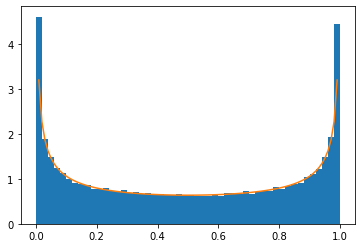

In [2]:
# Respuesta Andrés Green
def var_alt(fx,funcinv,n): # definimos la función 
    U = np.random.uniform(0,1,n) #generación de variables aleatorios repartidos de manera uniforme
    random_func = funcinv(U)
    x = np.arange(0,1,.01)
    fx = fx(x)
    plt.hist(random_func,bins=50,density=True) #gráfica para enseñar el comportamiento 
    plt.plot(x,fx)
    plt.show();

n = 100000
fx = lambda x: 1/(np.pi*np.sqrt(1-x)*np.sqrt(x)) #derivada 
funcinv = lambda y: np.sin(y*np.pi/2)**2 # función inversa
var_alt(fx,funcinv,n) 
    
    
    

C:\Users\Juan Pablo\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


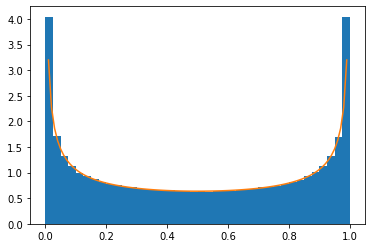

In [3]:
# Respuesta Juan Pablo Rivera
def com_den(fx, inv, N):
    u = np.random.uniform(0,1,N)
    f_random = inv(u)
    x = np.arange(0,1,.01)
    fx = fx(x)
    plt.hist(f_random,bins=40,density = True)
    plt.plot(x,fx)
    plt.show();
N = 10**6 
fx =lambda x:1/(np.pi*np.sqrt(1-x)*np.sqrt(x))
inv =lambda y: np.sin(y*np.pi/2)**2
com_den(fx,inv,N)



 #### Derivada
 $$\frac{1}{x \sqrt {-(x-1)x}}$$

#### Funcion Inversa
$$x=\sin^{2}(\frac{\mu\pi}{2})$$


> 2. Generación variable aleatoria Discreta
> La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.
> Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que $$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
> Por propiedades de la operación factorial la anterior $p_i$ se puede escribir como:
> $$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$

> **Nota:** Por notación recuerde que para el caso continuo $f(x)$ es la distribución de probabilidad (PDF), mientras $F(x)$ corresponde a la distribución de probabilidad acumulada (CDF). Para el caso discreto, $P(X=i)$ corresponde a su distribución de probabilidad (PMF) y $ F_{X}(x)=\operatorname {P} (X\leq x)=\sum _{x_{i}\leq x}\operatorname {P} (X=x_{i})=\sum _{x_{i}\leq x}p(x_{i})$, corresponde a su distribución de probabilidad acumulada (CDF).


Genere muestres aleatorias que distribuyan según la función dada usando el método de la transformada inversa y grafique el histograma de 100 muestras generadas con el método y compárela con el función $f(x)$ dada, esto con el fín de validar que el procedimiento fue realizado de manera correcta

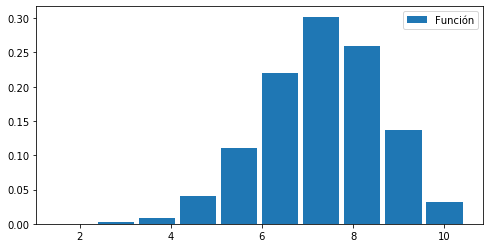

In [4]:
# Respuesta Andrés Green
def Gen_distr_discreta(U:'vector de números aleatorios', #clase 10
                       p_acum: 'P.Acumulada de la distribución a generar'):
    v = np.array(list(map(lambda j:sum(1 for i in p_acum if i<U[j]),range(N))))
    return v

def plot_histogram_discrete(distribucion:'señal de varibles aleatorias de un distribución DISCRETA dada',
                            label:'label del legend a aparecer en el gráfica',
                            densidad:'por defecto regresa el histograma en densidad'=True):
    plt.figure(figsize=[8,4])
    y,x = np.histogram(distribucion,bins = len(set(distribucion)),density = densidad) 
    plt.bar(x[1:],y,label=label)
    plt.legend()
    plt.show()
    
# Función que calcula la probabilidad acumulada optimizada 
# Continuación clase 10
def P_acum_Binomial_o(n,p):
    Pr = np.zeros(n)
    Pr[0] = (1-p)**n
    def pr(i):
        nonlocal Pr
        c  = p/(1-p)
        Pr[i+1]=(c*(n-i)/(i+1))*Pr[i]
        
    # Lleno el vector Pr usando compresión de listas
    [pr(i) for i in range(n-1)]
    return np.cumsum(Pr)

# def D_binomial_intermedia(n,p,N):
n = 10; p = 0.7; N = 10**4

p_acum = P_acum_Binomial_o(n,p)
u = np.random.rand(N)

# Usando el método de la transformada inversa
d_binomial = Gen_distr_discreta(u,p_acum)
plot_histogram_discrete(d_binomial,'Función')

In [5]:
# Respuesta Juan Pablo Rivera
#Genero la funcion para la distribución discreta
def Gen_distr_discreta(X:'vector de números aleatorios',
                       prob_ac: 'Prob.Acumulada de la distribución a generar'):
    v = np.array(list(map(lambda j:sum(1 for i in prob_ac if i<X[j]),range(N))))
    return v

def plot_histogram_discrete(distribucion:'señal de varibles aleatorias de un distribución DISCRETA dada',
                            label:'label del legend a aparecer en el gráfica',
                            densidad:'por defecto regresa el histograma en densidad'=True):
    # len(set(distribucion)) cuenta la cantidad de elementos distintos de la variable 'distribucion'
    plt.figure(figsize=[8,4])
    y,x = np.histogram(distribucion,bins = len(set(distribucion)),density = densidad) 
    plt.bar(x[1:],y,label=label)
    plt.legend()
    plt.show()
    

In [6]:
def P_acum_binomial(n,p):
    Pr = np.zeros(n)
    Pr[0] = (1-p)**n
    def pr(i):
        nonlocal Pr
        c  = p/(1-p)
        Pr[i+1]=(c*(n-i)/(i+1))*Pr[i]
        
    # Lleno el vector Pr usando compresión de listas
    [pr(i) for i in range(n-1)]
    return np.cumsum(Pr)

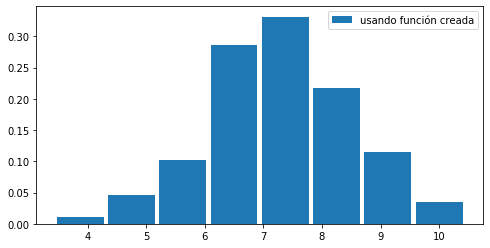

In [7]:
# def D_binomial_intermedia(n,p,N):
n = 10; p = 0.7; N = 100

p_acum = P_acum_binomial(n,p)
u = np.random.rand(N)

# Usando el método de la transformada inversa
d_binomial = Gen_distr_discreta(u,p_acum)
plot_histogram_discrete(d_binomial,'usando función creada')


Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.


El máximo de f es: [1.875] Y el máximo de t es [1.875]


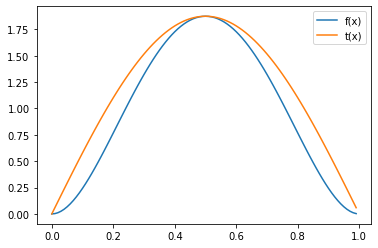

In [8]:
# Respuesta Andrés Green

# Ilustración del método de aceptación y rechazo cuando se toma t(x) constante

# Clase 10
# Función objetivo 
f = lambda x:30*(x**2-2*x**3+x**4)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t -> Función constante
t = lambda x: max_f*np.sin(np.pi*x) # función constante
max_t = f(optimize.fmin(lambda x:-t(x),0,disp=False))


x = np.arange(0,1,0.01)  # Rango donde se graficará las funciones
print('El máximo de f es:',max_f,'Y el máximo de t es', max_t)
# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()



[1.875] [1.875]


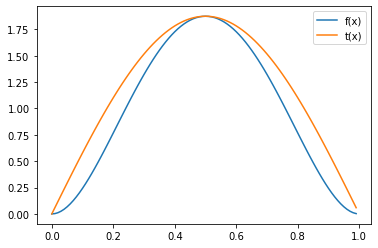

In [9]:
# Respuesta Juan Pablo Rivera
f = lambda x:30*(x**2-2*x**3+x**4)
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
t = lambda x: max_f*np.sin(x*np.pi) 
max_t = f(optimize.fmin(lambda x:-t(x),0,disp=False))

x = np.arange(0,1,0.01) 
print(max_f,max_t)
# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).

Respuesta conjunta Juan Pablo Rivera y Andrés Green
$$a=0$$

$$b=1$$

$$g(x)=\frac{f(x)}{c}$$

$$c = \int_{-\infty}^{\infty} t(x) dx$$.

$$ c=\int_{a}^{b} t(x)  dx$$

$$ c=\int_{0}^{1} t(x)  dx$$

$$c= \int_{0}^{1} a \sin(\pi x) dx$$

$$c= \frac{2a}{\pi} $$

$$ g(x) = \frac{ \pi \sin(\pi x)}{2} $$


3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 

 Respuesta conjunta Juan Pablo Rivera Y Andrés Green
 
 $$G(x) = \int g(x)dx $$
 
 $$ G(x) =  \int_{0}^{x} \frac{ \pi \sin(\pi x)}{2} dx$$

$$ u = \frac{1}{2}(- \cos(\pi x)+1) $$

$$ 2u = (- \cos(\pi x)+1) $$

$$ 2u-1 = - \cos(\pi x) $$

$$ \cos^{-1}(-2u+1) = \pi x$$

$$x= \frac{\cos^{-1}(-2u+1)}{\pi}$$

4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. 

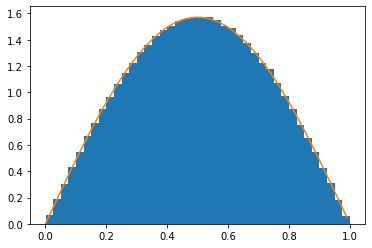

In [10]:
# Respuesta Andrés Green
n=10**6
g_x = lambda x: (np.pi*np.sin(np.pi*x))/2
equis = lambda u: (np.arccos(-2*u+1))/np.pi
com_den(g_x,equis,n)

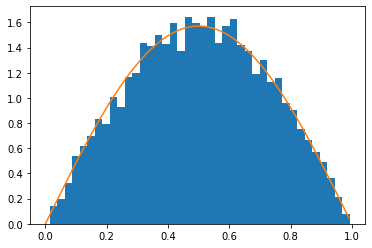

In [11]:
# Respuesta Juan Pablo Rivera
n=10000
g = lambda x: (np.pi / 2) * np.sin(np.pi * x)
g_inv = lambda u: (1 / np.pi) * np.arccos(-2 * u + 1)
com_den(g,g_inv,n)

5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados. 

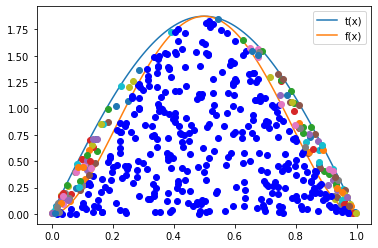

In [12]:
# Respuesta Andrés Green

#Código clase 10

# Función de aceptación y rechazo usando compresión de listas
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <= f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]                
    plt.show()
    
N = 500  # número de puntos
# Función objetivo
x = np.arange(0,1,0.01)

plt.plot(x,t(x),label='t(x)')
plt.plot(x,f(x),label='f(x)')
R2 = np.random.rand(N)
R1 = np.random.rand(N)
plt.legend()

green = Acep_rechazo(R2,R1,f,t)

plt.show(green)

In [13]:
# Respuesta Juan Pablo Rivera
# Código de solución 
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
    f_x = f(R1)
    t_x = t(R1)
    q = 0
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]                
    plt.show()

El máximo de f es: [1.875]


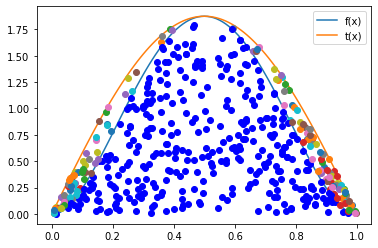

In [14]:
x = np.arange(0,1,0.01)
print('El máximo de f es:',max_f)

plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

N = 500 
R2 = np.random.rand(N)
R1 = np.random.rand(N) 

quantity_sin = Acep_rechazo(R2,R1,f,t)

6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir

In [15]:
# Respuesta Andrés Green

# Respuesta Andrés Green

#Código clase 10

# Función de aceptación y rechazo usando compresión de listas
def Acep_rechazo_sin(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
    f_x = f(R1)
    t_x = t(R1)
    contador = np.zeros(len(R1))
    condicion = R2*t_x <=f_x
    def a(i):
        nonlocal contador
        contador [i] = True if condicion[i] else False 
    [a(i) for i in range(len(R1))]

    return contador


f = lambda x:30*(x**2-2*x**3+x**4)
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t -> Función constante
t_0= lambda x: max_f*np.sin(x*np.pi) 
t_1= lambda x: max_f*np.ones(len(x))  
    
N = 500  # número de puntos
# Función objetivo
x = np.arange(0,1,0.01)

R2 = np.random.rand(N)
R1 = np.random.rand(N)


print('El porcentaje para t(x) constante es ',sum(Acep_rechazo_sin(R2,R1,f,t_0))/N, ' y para t(x) pulso senoidal es de ', sum(Acep_rechazo_sin(R2,R1,f,t_1))/N)

El porcentaje para t(x) constante es  0.698  y para t(x) pulso senoidal es de  0.536


In [16]:
# Respuesta Juan Pablo Rivera
def Acep_rechazo2(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
    f_x = f(R1)
    t_x = t(R1)
    cont = np.zeros(len(R1))
    condition = R2*t_x <=f_x
    def a(i):
        nonlocal cont
        cont [i] = True if condition[i] else False 
    [a(i) for i in range(len(R1))]

    return cont

f = lambda x:30*(x**2-2*x**3+x**4)
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t -> Función constante
t1= lambda x: max_f*np.sin(x*np.pi) 
t2= lambda x: max_f*np.ones(len(x))  
x = np.arange(0,1,0.01)  

# Validación del método
N = 500
R2 = np.random.rand(N)
R1 = np.random.rand(N)

print('El porcentaje de puntos de aceptación cuando se usa 𝑡(𝑥) constante es de', sum(Acep_rechazo2(R2,R1,f,t1))/N)
print('El porcentaje de puntos de aceptación cuando se usa 𝑡(𝑥) un pulso senoidal es de ', sum(Acep_rechazo2(R2,R1,f,t2))/N)

El porcentaje de puntos de aceptación cuando se usa 𝑡(𝑥) constante es de 0.724
El porcentaje de puntos de aceptación cuando se usa 𝑡(𝑥) un pulso senoidal es de  0.59


7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

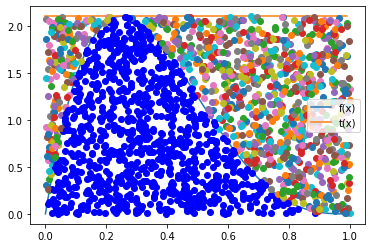

In [20]:
# Respuesta Andrés Green

# Función objetivo 
f = lambda x:20*x*(1-x)**3
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t -> Función constante
t = lambda x: max_f*np.ones(len(x)) # función constante

x = np.arange(0,1,0.01)  # Rango donde se graficará las funciones
# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

# Validación del método
N = 2000 # número de puntos a simular

R2 = np.random.rand(N)
R1 = np.random.rand(N)
siete = Acep_rechazo(R2,R1,f,t)

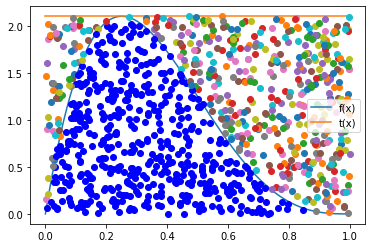

In [18]:
# Respuesta Juan Pablo Rivera
f = lambda x:20*x*(1-x)**3
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
t = lambda x: max_f*np.ones(len(x)) 

x = np.arange(0,1,0.01)  
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

# Validación del método
N = 1000 
R2 = np.random.rand(N)
R1 = np.random.rand(N)

Acep_rechazo(R2,R1,f,t)